In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# import decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score,roc_auc_score,confusion_matrix
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv('data/processeddata.csv')
df.head()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_No,RainToday_Yes,RainTomorrow
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,...,0,0,0,0,0,1,0,1,0,0
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,...,0,0,0,0,0,0,1,1,0,0
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,...,0,0,0,0,0,0,1,1,0,0
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,...,0,0,0,0,0,0,0,1,0,0
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
def plot_confustion_matrix(y_test,y_pred):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d")
    plt.title("Confusion Matrix")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.show()

Accuracy score:  0.8133934262041337
Recall score:  0.4269366197183099
Precision score:  0.4040544293251874
ROC AUC score:  0.6556495793925099
F1 score:  0.41518048223712367
Specificity:  0.8843625390667098
Confusion Matrix: 


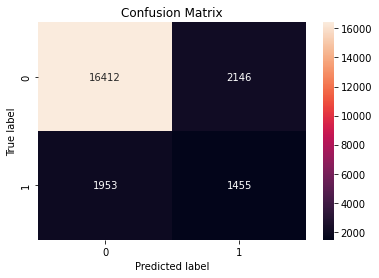

In [ ]:
#lab note
dt = DecisionTreeClassifier()
X = df.drop('RainTomorrow',axis=1)
y = df['RainTomorrow']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print('Accuracy score: ',accuracy_score(y_test,y_pred))
# print('R2 score: ',r2_score(y_test,y_pred))
print('Recall score: ',recall_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred))
print('ROC AUC score: ',roc_auc_score(y_test,y_pred))
print("F1 score: ",f1_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print("Specificity: ",cm[0,0]/(cm[0,0]+cm[0,1]))
print("Confusion Matrix: ")
plot_confustion_matrix(y_test,y_pred)


In [ ]:
#Parmater tuning

from sklearn.model_selection import GridSearchCV

In [ ]:
params = {"criterion":['gini','entropy'],
          "max_depth":range(3,8),
          "max_leaf_nodes":range(2,8)}

grid = GridSearchCV(dt,params,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)


{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 7}
0.8633311585845622
DecisionTreeClassifier(max_depth=3, max_leaf_nodes=7)


Accuracy score:  0.8649731403077483
Recall score:  0.27142018779342725
Precision score:  0.6569602272727273
ROC AUC score:  0.6226968381579487
F1 score:  0.38413621262458475
Specificity:  0.9739734885224701
Confusion Matrix: 


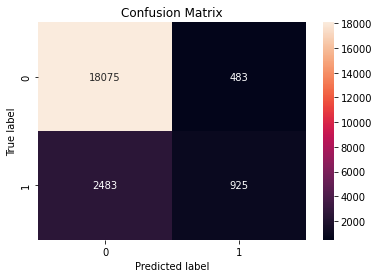

In [ ]:
#train model with best parameters
dt = DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=7)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
print('Accuracy score: ',accuracy_score(y_test,y_pred))
# print('R2 score: ',r2_score(y_test,y_pred))
print('Recall score: ',recall_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred))
print('ROC AUC score: ',roc_auc_score(y_test,y_pred))
print("F1 score: ",f1_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print("Specificity: ",cm[0,0]/(cm[0,0]+cm[0,1]))
print("Confusion Matrix: ")
plot_confustion_matrix(y_test,y_pred)

Accuracy score:  0.8706182281708095
Recall score:  0.22946009389671362
Precision score:  0.7835671342685371
ROC AUC score:  0.6089104543198408
F1 score:  0.35497049477984566
Specificity:  0.988360814742968
Confusion Matrix: 


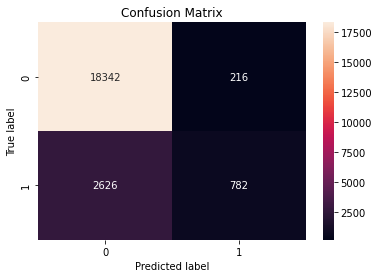

In [ ]:
#train neural network
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier()
mlp.fit(X_train,y_train)
y_pred = mlp.predict(X_test)
print('Accuracy score: ',accuracy_score(y_test,y_pred))
# print('R2 score: ',r2_score(y_test,y_pred))
print('Recall score: ',recall_score(y_test,y_pred))
print('Precision score: ',precision_score(y_test,y_pred))
print('ROC AUC score: ',roc_auc_score(y_test,y_pred))
print("F1 score: ",f1_score(y_test,y_pred))
cm = confusion_matrix(y_test,y_pred)
print("Specificity: ",cm[0,0]/(cm[0,0]+cm[0,1]))
print("Confusion Matrix: ")
plot_confustion_matrix(y_test,y_pred)


In [ ]:
#gridsearch for mlpclassifier
params = {"hidden_layer_sizes": [(100,),(100,100),(100,100,100)],
            "activation":['identity','logistic','tanh','relu'],
            "solver":['lbfgs','sgd','adam'],
            "alpha":[0.0001,0.001,0.01,0.1,1],
            "learning_rate":['constant','invscaling','adaptive']}
grid = GridSearchCV(mlp,params,cv=5)
grid.fit(X_train,y_train)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_estimator_)
#train model with best parameters
mlp = MLPClassifier(activation='tanh',alpha=0.0001,hidden_layer_sizes=(100,100,100),learning_rate='constant',solver='lbfgs')

## Decision Tree vs Multilayer Perceptron

### Metrics

<!-- |Metrics|Logistic Regression|Naive Bayes|
|:-|:-|:-|
|Precision|0.67|0.92|
|Specificity|0.97|0.77|
|R2 score|0.377|0.87|
|Classification error|0.13|0.12| -->

|Metrics|Decision Tree|Multilayer Perceptron|
|:-|:-|:-|
|Precision|0.92|0.443|
|Recall|0.27|0.6|
|R2 score|-0.03|-0.36|
|Accuracy|0.86|0.82|

We can see that the Decision Tree model has a better precision than the Multilayer Perceptron model. The Decision Tree model has a better R2 score than the Multilayer Perceptron model. The Decision Tree model has a better accuracy than the Multilayer Perceptron model. But the Multilayer Perceptron model has a better recall than the Decision Tree model.

So we can conclude that the Decision Tree model is better than the Multilayer Perceptron model in predicting negative class and the Multilayer Perceptron model is better than the Decision Tree model in predicting positive class.